In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from numpy import genfromtxt
from tensorflow.keras import layers
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import math
import torch
from sklearn.model_selection import train_test_split

In [174]:
#тренировочный и тестовый датафреймы
df_train=pd.read_csv("fmnist_train.csv")
df_test=pd.read_csv("fmnist_test.csv")

In [175]:
#перевод тренировочного массива в numpy
y=df_train['label']
y=y.to_numpy()

train_data_x = df_train.iloc[:, 1:785]

X = train_data_x.to_numpy(dtype=np.float32)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=15, shuffle=True, stratify=y)

#перевод тестового массива в numpy
val_data_x = df_test.iloc[:, 0:784]
val = val_data_x.to_numpy(dtype=np.float32)


In [176]:
#перевод всех массивов к форме 28 на 28 пикселей
train_x = train_x.reshape(train_x.shape[0], 28, 28,1)
test_x=test_x.reshape(test_x.shape[0],28,28,1)
val_x=val.reshape(val.shape[0],28,28,1)

print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

#запомнить количество данных
num_train_ex=train_x.shape[0]
num_test_ex=test_x.shape[0]
num_val_ex=val_x.shape[0]

(13632, 28, 28, 1)
(3408, 28, 28, 1)
(10000, 28, 28, 1)


In [177]:
#нормализация данных
train_x = train_x.astype('int64')
train_x = train_x / 255

test_x = test_x.astype('int64')
test_x = test_x / 255

val_x = val_x.astype('int64')
val_x = val_x / 255

(28, 28, 1)


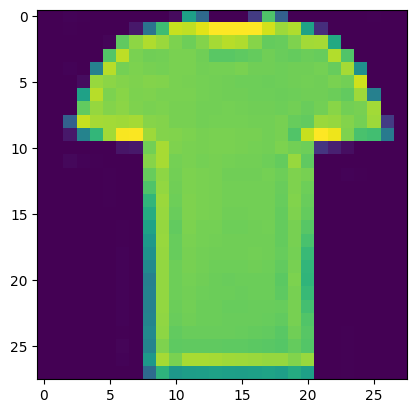

In [178]:
#вывод по 1 примерному изображению из всех наборов
plt.imshow(train_x[30])
print(train_x[0].shape)

(28, 28, 1)


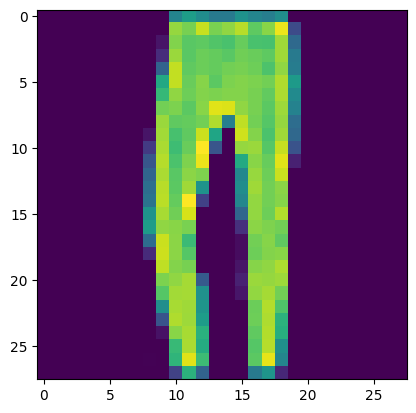

In [179]:
plt.imshow(test_x[30])
print(test_x[0].shape)

(28, 28, 1)


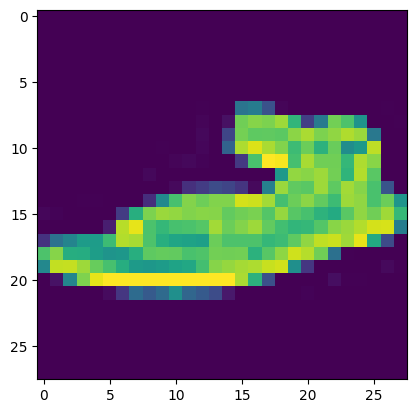

In [180]:
plt.imshow(val_x[30])
print(val_x[0].shape)

In [181]:
#создание списка категорий
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]

In [182]:
#количество тренировачных, тестовых и валидационных данных
print("Number of training examples: {}".format(num_train_ex))
print("Number of test examples:     {}".format(num_test_ex))
print("Number of val examples:     {}".format(num_val_ex))

Number of training examples: 13632
Number of test examples:     3408
Number of val examples:     10000


In [183]:
#перевод выборок в тензоры
train_dataset = tf.data.Dataset.from_tensor_slices((train_x,train_y))
train_dataset= train_dataset.prefetch(1)
print(train_dataset)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x,test_y))
test_dataset= test_dataset.prefetch(1)
print(test_dataset)

val_dataset = tf.data.Dataset.from_tensor_slices((val_x))
val_dataset= val_dataset.prefetch(1)
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


<_PrefetchDataset element_spec=TensorSpec(shape=(28, 28, 1), dtype=tf.float64, name=None)>

2023-05-26 19:53:21.773777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [3408]
	 [[{{node Placeholder/_1}}]]
2023-05-26 19:53:21.774041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [3408]
	 [[{{node Placeholder/_1}}]]


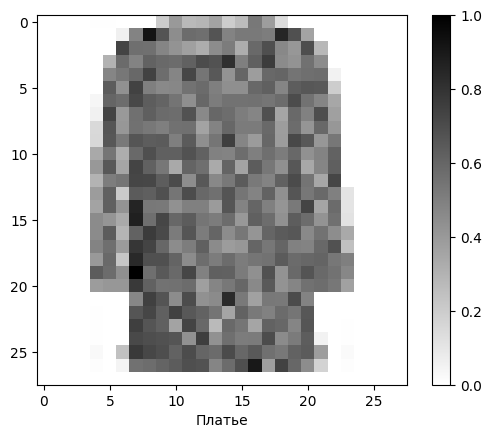

In [184]:
#просмотр изображения из тестовой выборки
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[label])
plt.show()

2023-05-26 19:53:22.353383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [13632]
	 [[{{node Placeholder/_1}}]]


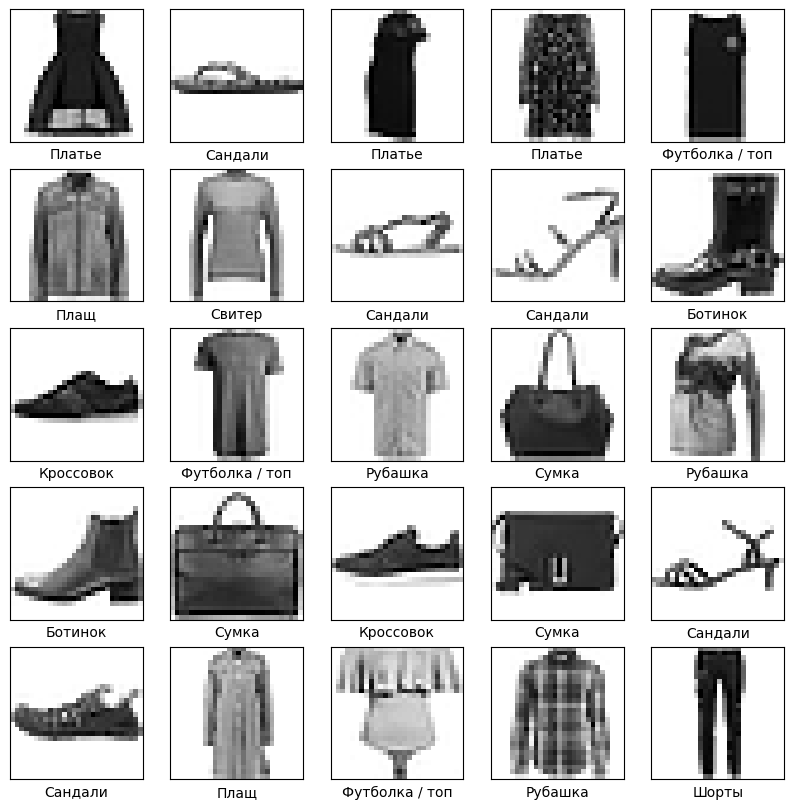

In [185]:
#выбор первых 25 изображений из тренировочной выборки и просмотр категорий
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

2023-05-26 19:53:23.402701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [10000,28,28,1]
	 [[{{node Placeholder/_0}}]]


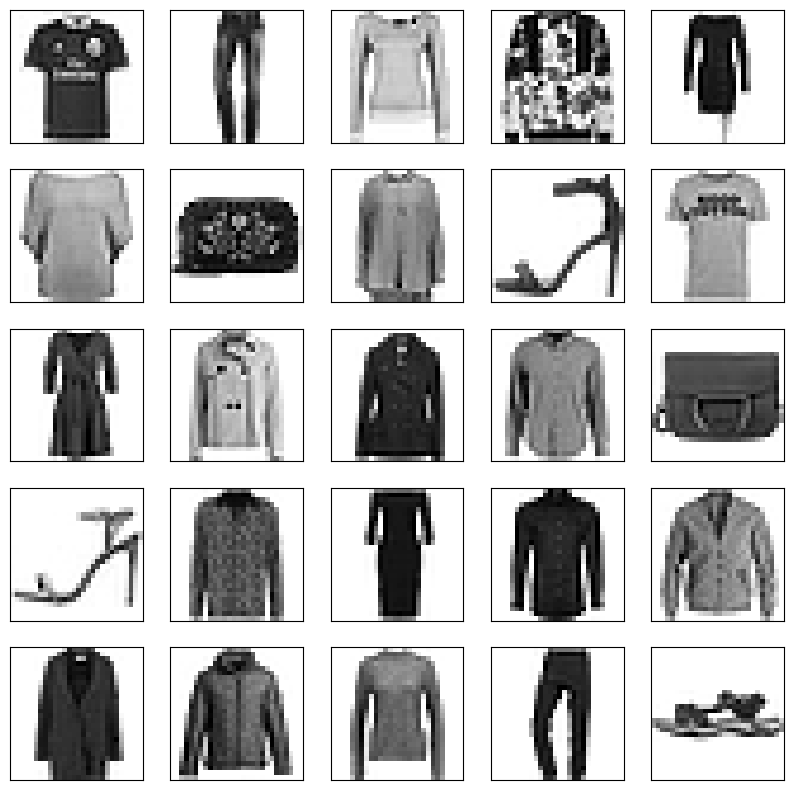

In [186]:
#выбор первых 25 изображений из валидационной выборки, категории в которой отсутствуют
plt.figure(figsize=(10,10))
for i, (image) in enumerate(val_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()

In [187]:
#создание модели
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [188]:
#компиляция модели
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [189]:
#обучение на тренировочных данных
model.fit(train_x, train_y, epochs=20)

Epoch 1/20
426/426 [==============================] - 1s 1ms/step - loss: 0.6685 - accuracy: 0.7655
Epoch 2/20
426/426 [==============================] - 1s 1ms/step - loss: 0.4717 - accuracy: 0.8338
Epoch 3/20
426/426 [==============================] - 1s 1ms/step - loss: 0.4217 - accuracy: 0.8506
Epoch 4/20
426/426 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8566
Epoch 5/20
426/426 [==============================] - 1s 1ms/step - loss: 0.3708 - accuracy: 0.8644
Epoch 6/20
426/426 [==============================] - 1s 1ms/step - loss: 0.3420 - accuracy: 0.8776
Epoch 7/20
426/426 [==============================] - 1s 1ms/step - loss: 0.3269 - accuracy: 0.8782
Epoch 8/20
426/426 [==============================] - 1s 1ms/step - loss: 0.3094 - accuracy: 0.8870
Epoch 9/20
426/426 [==============================] - 1s 1ms/step - loss: 0.2941 - accuracy: 0.8914
Epoch 10/20
426/426 [==============================] - 1s 1ms/step - loss: 0.2774 - accuracy: 0.8995

In [190]:
#Получить значение метрики accuracy
loss, accuracy = model.evaluate(test_x, test_y)
print("Тестовая оценка:", accuracy*100, "%")

107/107 [==============================] - 0s 1ms/step - loss: 364110013267968.0000 - accuracy: 0.8697
Тестовая оценка: 86.97183132171631 %


In [191]:
#создание предсказаний
prediction = model.predict(val_x)
prediction.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [192]:
#создание списка с предсказаниями категорий
category=[]
for i in prediction:
    category.append(np.argmax(i))

In [193]:
#сохранение результатов в файл 
submission = {
    'Id': list(df_test.Id.values),
    'Category': category
}
solution = pd.DataFrame(submission)
solution.to_csv('submission.csv',index=False)

# Проверка предсказаний - какие категории определились для изображений валидационного датасета 

In [194]:
#добавление предсказний в валидационный датасет

#датасет с предсказаниями
df_predict=pd.read_csv("submission.csv")

#новый датасет на основе тестого
new_val_df=df_test

In [195]:
df_predict.head()

,Id,Category
0,0,0
1,1,1
2,2,2
3,3,2
4,4,4


In [196]:
new_val_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [197]:
#обьединение датасетов по идентификатору для добавления категорий (label)
final_df = new_val_df.merge(df_predict, on='Id', how='left')

In [198]:
final_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id,Category
0,0,0,0,0,0,0,0,9,8,0,...,56,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,63,53,31,0,0,0,2,2
3,0,0,0,0,0,0,0,0,0,161,...,140,0,133,224,222,56,0,0,3,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4


In [199]:
#приведение массива в numpy и к форме 28 на 28 пикселей

#отдельный массив с категориями
final_category=final_df['Category'].to_numpy()

#массив с изображениями
new_final_arr = final_df.iloc[:, 0:784].to_numpy(dtype=np.float32).reshape(val.shape[0],28,28,1)

#нормализация
new_final_arr = new_final_arr.astype('int64')
new_final_arr = new_final_arr / 255

(28, 28, 1)


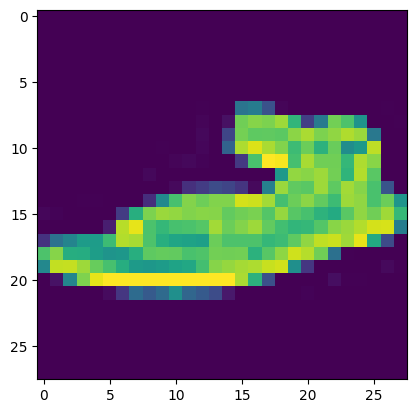

In [200]:
#Вывод 1 примерного изображения из набора
plt.imshow(new_final_arr[30])
print(new_final_arr[0].shape)

In [201]:
#перевод выборки в тензор
final_dataset = tf.data.Dataset.from_tensor_slices((new_final_arr,final_category))
final_dataset= final_dataset.prefetch(1)
print(final_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


2023-05-26 19:53:39.245340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [10000]
	 [[{{node Placeholder/_1}}]]


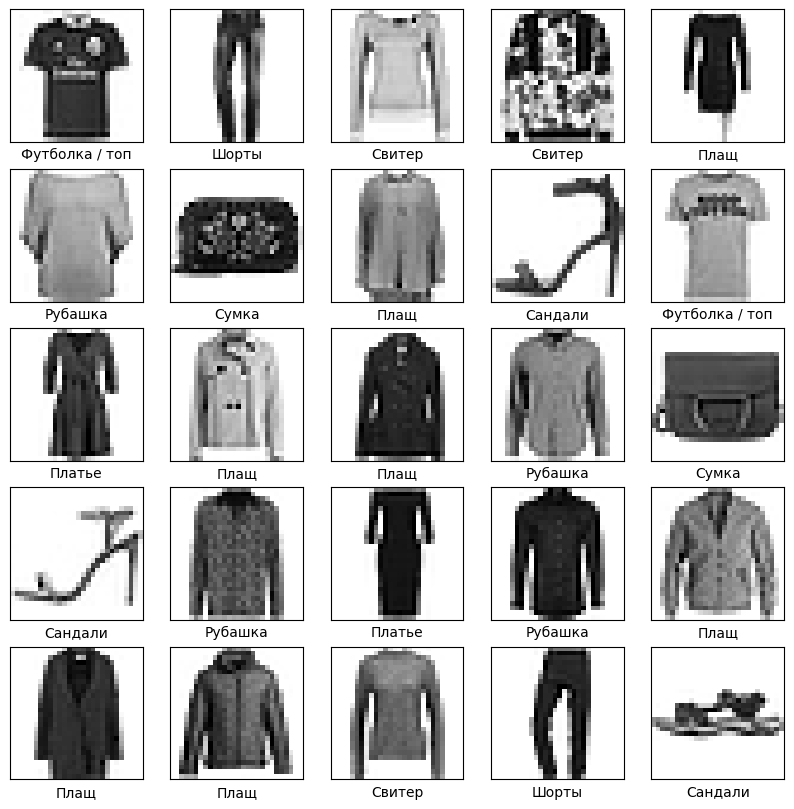

In [202]:
#выбор первых 25 изображений из выборки и просмотр категорий
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(final_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

# Вывод - видно как классифицировались изображения одежды из тестового датасета по категориям